# Regression

- About Regression and its types
- Linear Regression
    - OLS Model and Evaluation
    - Multicollinearity
- Regularization in Regression

## About Regression

- It's a Supervised Learning machine learning technique that is used to predict **continuous values** (target or y) based on features (input variables or x)
- It establishes a relationship between the independent variable(s) (X or features) and the dependent variable (y or target)

- We have different types of Regression Models:
    - Linear
        - Linear Regression
        - Lasso Regression
        - Ridge Regression
    - Linear and Non-Linear 
        - Polynomial Regression
        - Support Vector Regressor 
        - Decision Tree Regressor
        - More Advanced Regression models

- For **Linear Regression**, we have 2 main categories:
    1. Simple Linear Regression
        - One independent variable (X) and a dependent variable (y)
        - Equation: $y = B_0 + B_1X$  similar to the equation of a line $y = mx + c$ (m: slope [rate of change/rise/run] and c: y-intercept [where the line crosses the y-axis
    2. Multiple-Linear Regression
        - Multiple independent variables (X1, X2, X3,...,Xn) and a dependent variable (y)
        - Equation: $y = B_0 + B_1X_1 + B_2X_2 + B_3X_3 + ... + B_nX_n$ (We have multiple slope values $ B_1, B_2, B_3...$ and y-intercept)

![linreg](https://miro.medium.com/v2/resize:fit:800/0*_RYGlkVN4U-zzMXH.png)

## Linear Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

### California Housing Dataset

In [2]:
cal_housing = fetch_california_housing()
print(cal_housing.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [3]:

print(cal_housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
cal_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
df = pd.DataFrame(cal_housing['data'], columns=cal_housing['feature_names'])
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [6]:
# add the target
df['MedHouseVal'] = cal_housing['target']
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [7]:
# alternative method - easier
#cal_housing = fetch_california_housing(as_frame=True)
#df = cal_housing.frame

In [8]:
# checking for nulls
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

- **HouseAge** median is 29 and mean is 28.63:
    - The data is normally distributed because the mean is very close to the median
    - half of the houses are older than 29 years
- **AveRooms** include ( Kitchen, living room etcg) and some of units can be studios
- **MedInc** average income around $38,700 (1990 old salary levels)
- **Population** we have a very wide range and dispersion. Can be observed from the min (3), max (35,682), and std
- **AveOccup** min is 0.69, which tells us some properties are vacant in some of those blocks

<Axes: xlabel='AveOccup', ylabel='Count'>

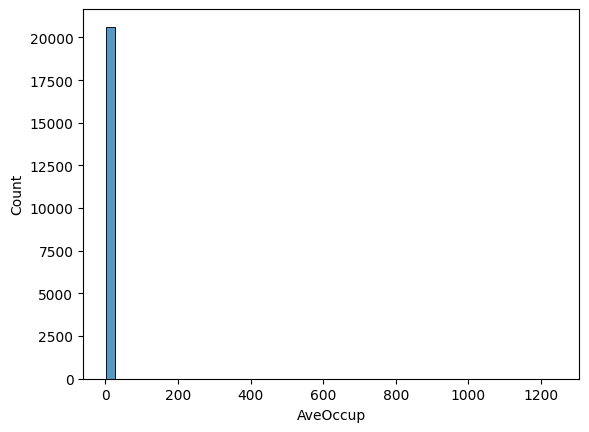

In [11]:
sns.histplot(df['AveOccup'], bins=50)

<Axes: ylabel='AveOccup'>

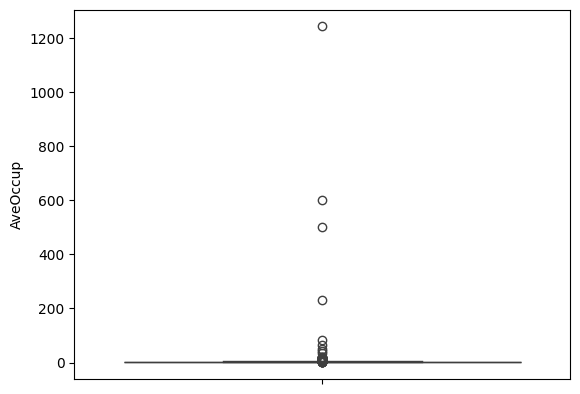

In [12]:
sns.boxplot(df['AveOccup'])

<Axes: xlabel='AveOccup', ylabel='Count'>

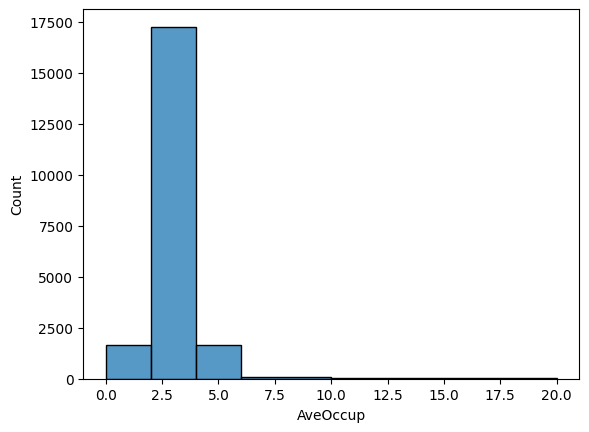

In [13]:
sns.histplot(df['AveOccup'], bins=[0,2,4,6,10,20])

In [14]:
AvgOccup_UL = df['AveOccup'].quantile(0.95) #upper limit
AvgOccup_LL = df['AveOccup'].quantile(0.05) #lower limit
print('Upper Limit:', AvgOccup_UL)
print('Lower Limit:', AvgOccup_LL)

Upper Limit: 4.333416666666666
Lower Limit: 1.872544757033248


- The analysis above tells us that have very large outliers in Average Occupance column
- We need to perform outlier treatment

In [15]:
df_org = df.copy()

<Axes: ylabel='AveOccup'>

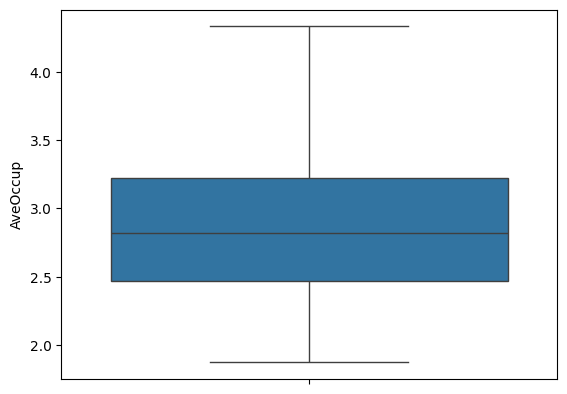

In [16]:
mask = (df['AveOccup'] < AvgOccup_UL) & (df['AveOccup'] > AvgOccup_LL)

df = df[mask]
sns.boxplot(df['AveOccup'])

In [17]:
print('Shape before:', df_org.shape)
print('Shape after:', df.shape)
print('Removed:', df_org.shape[0] - df.shape[0])

Shape before: (20640, 9)
Shape after: (18576, 9)
Removed: 2064


> Part of EDA is to check the quality of the data, therefore, we can validate that all data points fall into the map of California 

### Visualize The Data On A Map Using Long and Lat

Text(0, 0.5, 'Latitude')

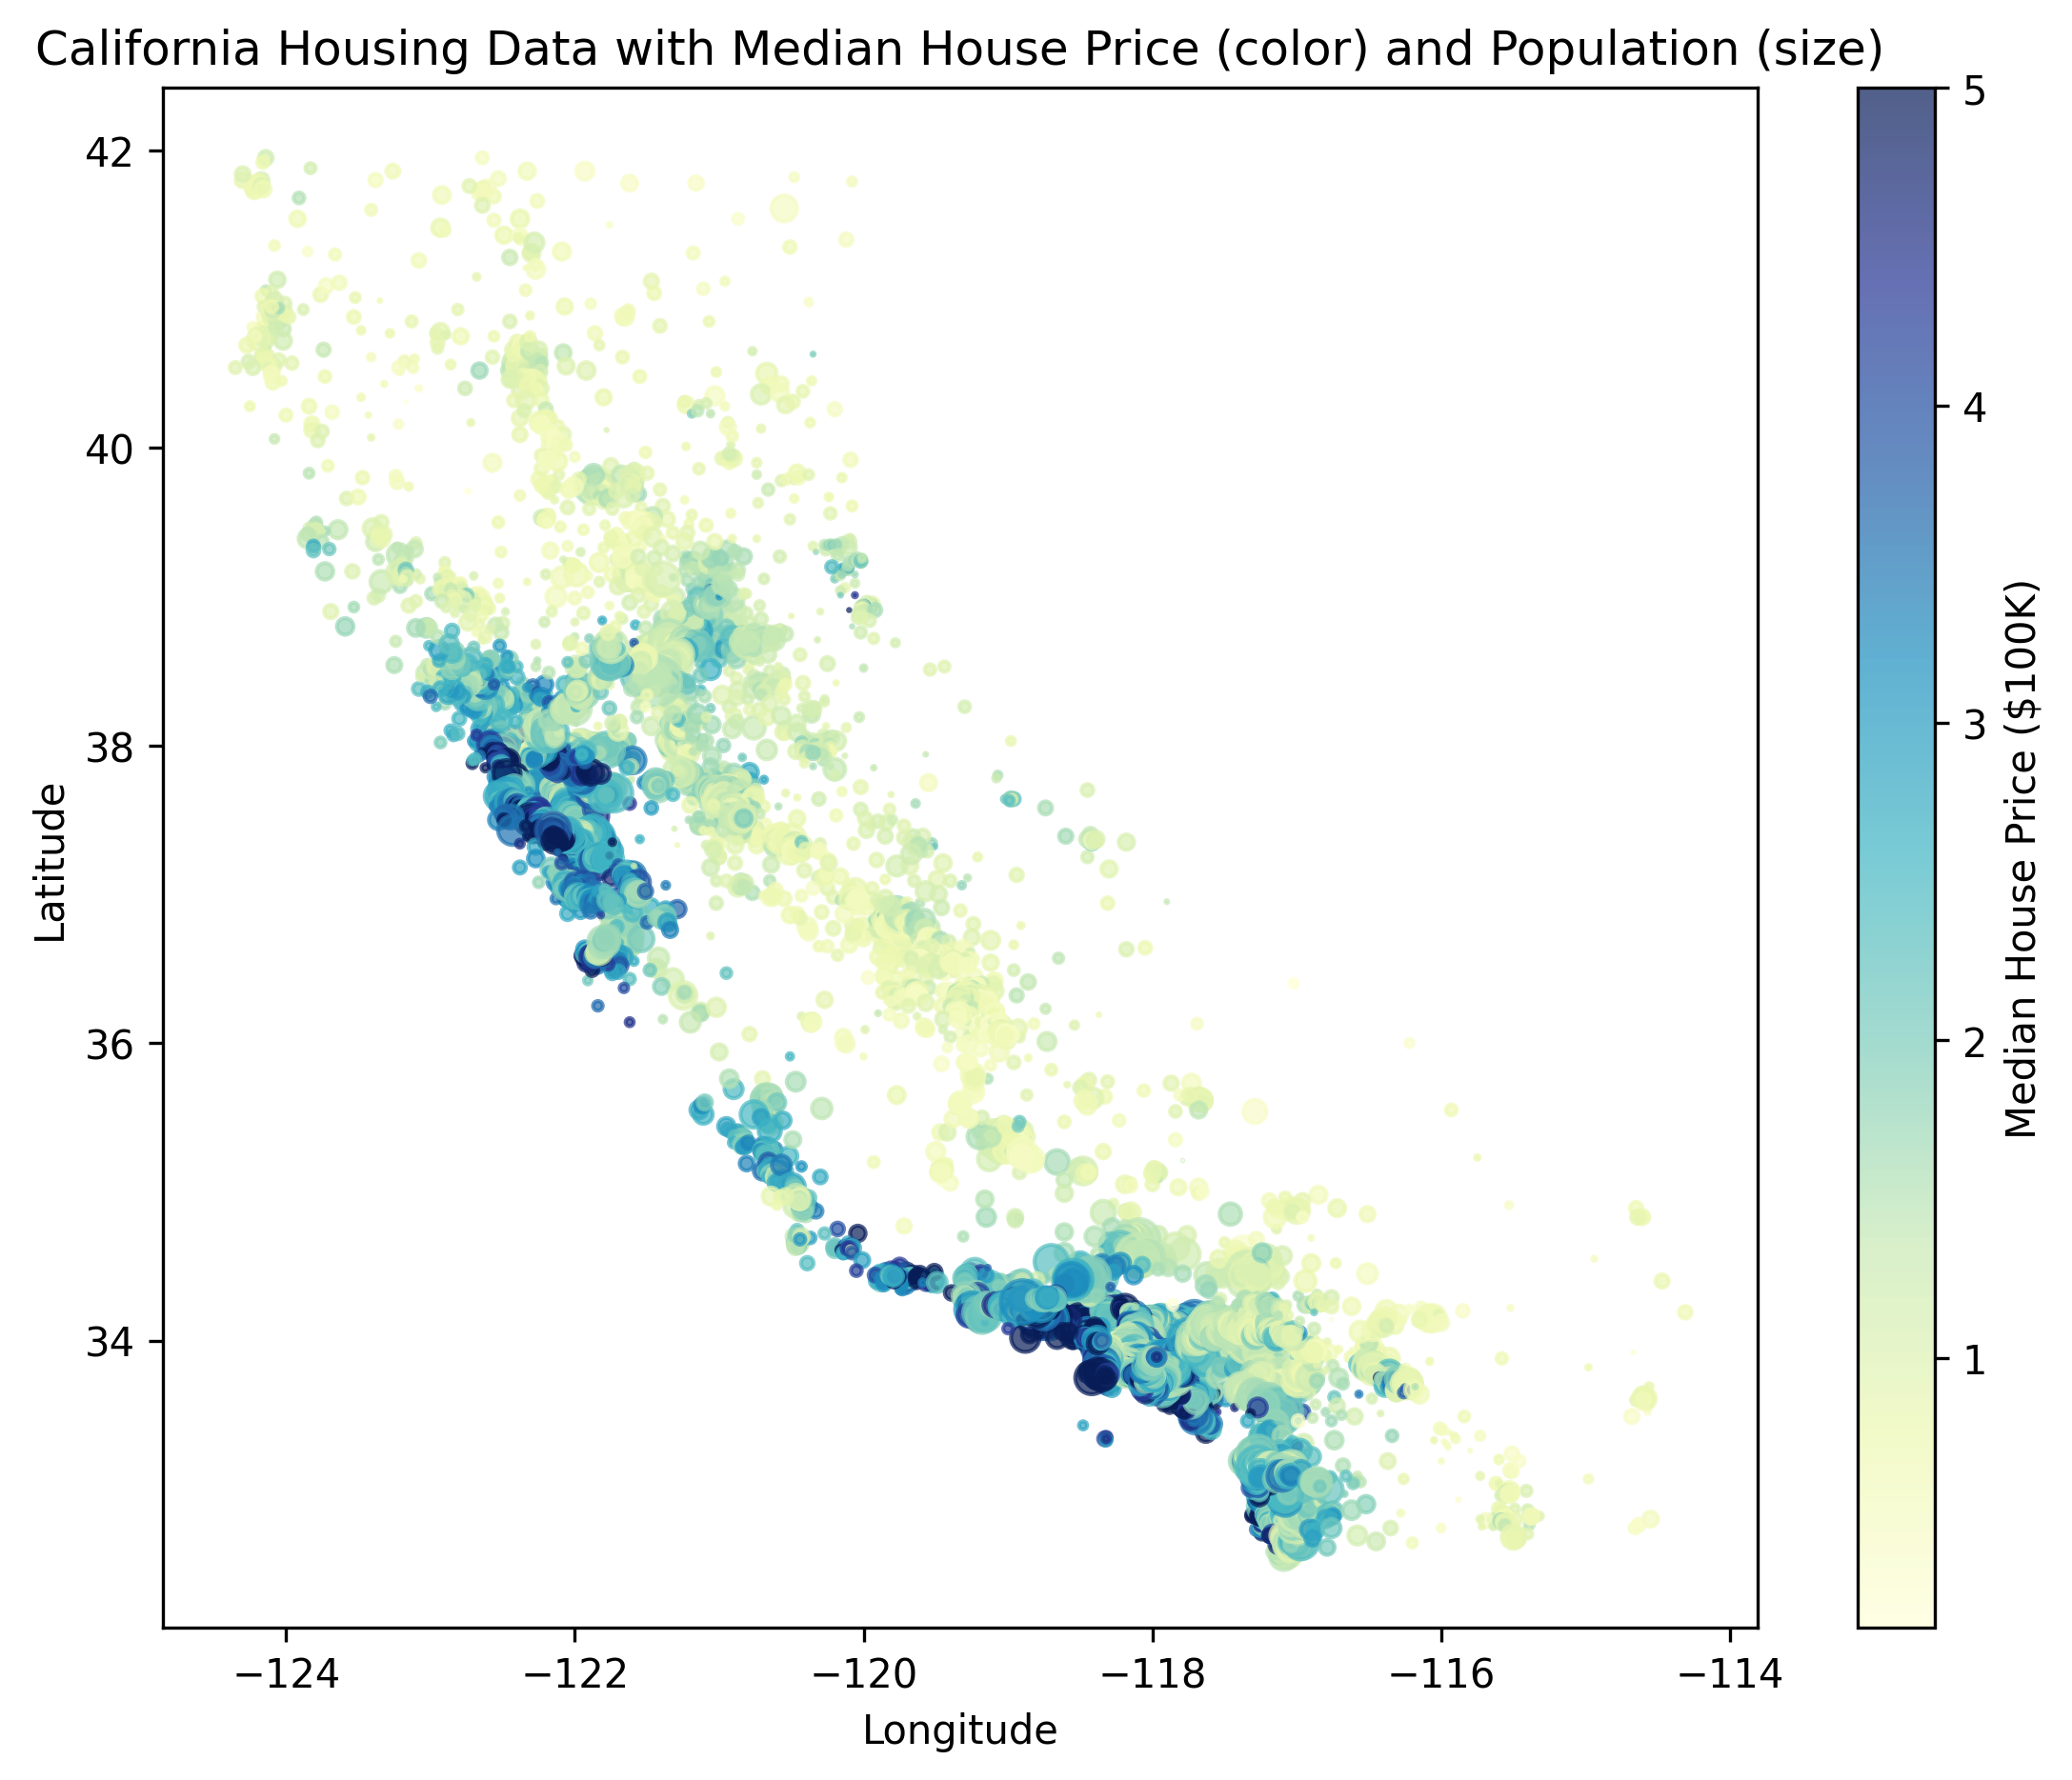

In [18]:
plt.figure(figsize=(9,7), dpi=300)

plt.scatter(x=df['Longitude'], y=df['Latitude'], c=df['MedHouseVal'], s=df['Population']/100, alpha=.7, cmap='YlGnBu')
plt.colorbar(label='Median House Price ($100K)')
plt.title('California Housing Data with Median House Price (color) and Population (size)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [19]:
# Create figure
plt.figure(figsize=(9, 7), dpi=300)

# Create Basemap instance
m = Basemap(projection='merc', llcrnrlon=-125, llcrnrlat=32,
            urcrnrlon=-114, urcrnrlat=42, resolution='i')

# Draw map with dark background
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgrey', lake_color='lightblue')
m.drawcoastlines(color='darkgrey')
m.drawstates(color='#FFFFFF')

# Convert coordinates to map projection
x, y = m(df['Longitude'].values, df['Latitude'].values)

# Plot scatterplot
m.scatter(x, y, c=df['MedHouseVal'], s=df['Population']/100, alpha=.7, cmap='YlGnBu')

# Add colorbar
plt.colorbar(label='Median House Price ($100K)')

# Add title and labels
plt.title('California Housing Data with Median House Price (color) and Population (size)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()

NameError: name 'Basemap' is not defined

<Figure size 2700x2100 with 0 Axes>

In [ ]:
# Create a scatter plot with hover boxes, map background, and color based on target
fig = go.Figure(go.Scattermapbox(
    lat=df['Latitude'],
    lon=df['Longitude'],
    mode='markers',
    hoverinfo='text',
    hovertext=df.apply(lambda row: f"Median House Price: ${row['MedHouseVal']:.2f}<br>Median Income: ${row['MedInc']:.2f}<br>Median Age: {row['HouseAge']:.2f}<br>Ave Rooms: {row['AveRooms']:.2f}<br>Ave Bedrooms: {row['AveBedrms']:.2f}<br>Population: {row['Population']:,.2f}<br>Ave Occupancy: {row['AveOccup']:.2f}", axis=1),
    marker=go.scattermapbox.Marker(
        color=df['MedHouseVal'],
        colorscale='Viridis',
        size=df['Population']/300,
        colorbar=dict(
            title='Median House Price'
        )
    )
))

# Update the layout to display a map
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=5,
    mapbox_center_lat=37.7749,  # California's latitude
    mapbox_center_lon=-122.4194,  # California's longitude
    margin={"r": 0, "t": 0, "l": 0, "b": 0}
)

# Show the plot
fig.show()

<Axes: >

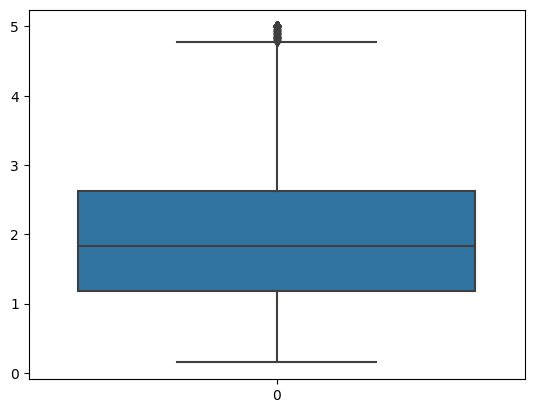

In [ ]:
sns.boxplot(df['MedHouseVal'])

We don't have significant outliers. We can proceed.

### Evaluating The Linearity of A Model

- Technically, you can jump straight into building the Linear Regression using `sklearn`. However, if the dataset is complex with a big number of features, it's always recommended to evaluate the model linearity using `statsmodels`
- `statsmodels.api` will build a linear regression model that explains how good of a fit the model is and provide coefficients ($B_1,B_2,...B_n$)
- Steps:
    1. Define X and y
    2. Add an arbitrary constant $B_0$ (will be adjusted later after fitting the model)
    3. Deploy the Linear Regression model(OLS - Ordinary Least Squares)
    4. Get the OLS Summary
    5. Check for Multicollinearity - modify the data if it exists
    6. Repeat steps 3 & 4 to get a better summary


In [ ]:
# step 1 - split the data into X and y
X = df.drop(columns='MedHouseVal', axis=1)
y = df['MedHouseVal']

In [ ]:
import statsmodels.api as sm

In [ ]:
# Step 2 - defining a constant
X_constant = sm.add_constant(X) 
X_constant.head()

const  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0    1.0  8.3252      41.0  6.984127   1.023810       322.0  2.555556   
1    1.0  8.3014      21.0  6.238137   0.971880      2401.0  2.109842   
2    1.0  7.2574      52.0  8.288136   1.073446       496.0  2.802260   
3    1.0  5.6431      52.0  5.817352   1.073059       558.0  2.547945   
4    1.0  3.8462      52.0  6.281853   1.081081       565.0  2.181467   

   Latitude  Longitude  
0     37.88    -122.23  
1     37.86    -122.22  
2     37.85    -122.24  
3     37.85    -122.25  
4     37.85    -122.25

In [ ]:
# Step 3
ols_model = sm.OLS(y, X_constant).fit()

In [ ]:
# Step 4
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     4888.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        09:45:12   Log-Likelihood:                -16115.
No. Observations:               17086   AIC:                         3.225e+04
Df Residuals:                   17077   BIC:                         3.232e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.3443      0.609    -54.711      0.000     -34.539     -32.150
MedInc         0.3917      0.004     97.420      0.000       0.384       0.400
HouseAge       0.0085      0.000     19.721      0.000       0.008       0.009
AveRooms      -0.0196      0.006     -3.327      0.001      -0.031      -0.008
AveBedrms      0.2198      0.029      7.666      0.000       0.164       0.276
Population  3.577e-05   4.76e-06      7.517      0.000    2.64e-05    4.51e-05
AveOccup      -0.4419      0.010    -42.309      0.000      -0.462      -0.421
Latitude      -0.4285      0.007    -64.674      0.000      -0.441      -0.416
Longitude     -0.4179      0.007    -60.207      0.000      -0.431      -0.404
==============================================================================
Omnibus:                     3074.662   Durbin-Watson:                   0.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10053.845
Skew:                           0.912   Prob(JB):                         0.00
Kurtosis:                       6.285   Cond. No.                     2.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- **R-Squared vs Adj R-Squared**: 
    - They show how good of a fit the model is to the data and how it's able to explain the variance in it.
    - Range is from 0 to 1 and the closer to 1 the better it is
    - 0.7 is ok, 0.8 is good, 0.9 and above is great
    - Adj. R-Squared is R-Squared with penalty added to reduce overfitting (Regularization)
- **Coefficient Report** (at the bottom of the summary) every feature (including the constant) has a coefficient value
    - **coef** is the estimated coefficient value (slopes and y-intercept) of each feature including the constant
        - This is for $y = B_0 + B_1X_1 + B_2X_2 + B_3X_3 + ... + B_nX_n$ 
        - For example, 
            - if the _MedInc_ goes up by 1 point, the target goes up by  up by 0.3970. This also works in the negative direction.
            - if the AvgRooms feature goes up by 1 unit, the target goes down by 0.0337 (negative val -0.0337)
        - Another example, if Age goes up by 1 unit(year), the target (MedHouseVal) will go up by 0.0085. It may not make sense at first, but for California, it depends a lot about location. The houses are old, but the land is worth a lot.

    - **p-value** associates the statistical significance with each coefficient. Low p-value indicates the coefficient is statistically significant.

**Conclusion about outlier treatment trial and error**
- we started with trimming 97th percentile upper bound fearing that 95th was going to drop too many records
- it turned out 95th percentile performed better than 97th, even though we lost more data

### Multicollinearity

- It's a scenario where 2 or more independent variables (features) in a regression model are **highly correlated** with each other.
- It can cause problems in estimating the coefficients of the model, leading to unstable results.
- Therefore, consider addressing multicollinearity when the objective of the problem is to derive the coefficients.
- When you reduce multicollinearity, you have less features and the model can focus on the ones that matter and with less noise. Therefore, you get better, more-reliable coefficients. 
- Note: you may get less accuracy (R-squared), but your goal here is to get the best values for coefficients.
- **Addressing Multicollinearity**:
    - Correlation Matrix or pairplots. i.e. independent variables should not have corr of .65 or .7 or greater between each other.
    - VIF (Variance Inflation Factor)

**NOTE**
- you can use Pearson correlation to identify highly correlated features and decide whether to drop them. 
- However, Pearson correlation only captures linear relationships, so it may miss more complex dependencies. Using Variance Inflation Factor (VIF) is often a better approach because it directly measures how much a feature is explained by others in the model.

#### Correlation Analysis

In [ ]:
corr_matrix = X.corr()
corr_matrix

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.115730  0.321431  -0.068840    0.011612 -0.038161   
HouseAge   -0.115730  1.000000 -0.149303  -0.074897   -0.335745 -0.063047   
AveRooms    0.321431 -0.149303  1.000000   0.856207   -0.074321 -0.060215   
AveBedrms  -0.068840 -0.074897  0.856207   1.000000   -0.062988 -0.078317   
Population  0.011612 -0.335745 -0.074321  -0.062988    1.000000  0.154949   
AveOccup   -0.038161 -0.063047 -0.060215  -0.078317    0.154949  1.000000   
Latitude   -0.110462  0.011399  0.093519   0.071674   -0.118595 -0.185834   
Longitude   0.005449 -0.114518 -0.021878   0.012550    0.108917  0.182186   

            Latitude  Longitude  
MedInc     -0.110462   0.005449  
HouseAge    0.011399  -0.114518  
AveRooms    0.093519  -0.021878  
AveBedrms   0.071674   0.012550  
Population -0.118595   0.108917  
AveOccup   -0.185834   0.182186  
Latitude    1.000000  -0.921672  
Longitude  -0.921672   1.000000

<Axes: >

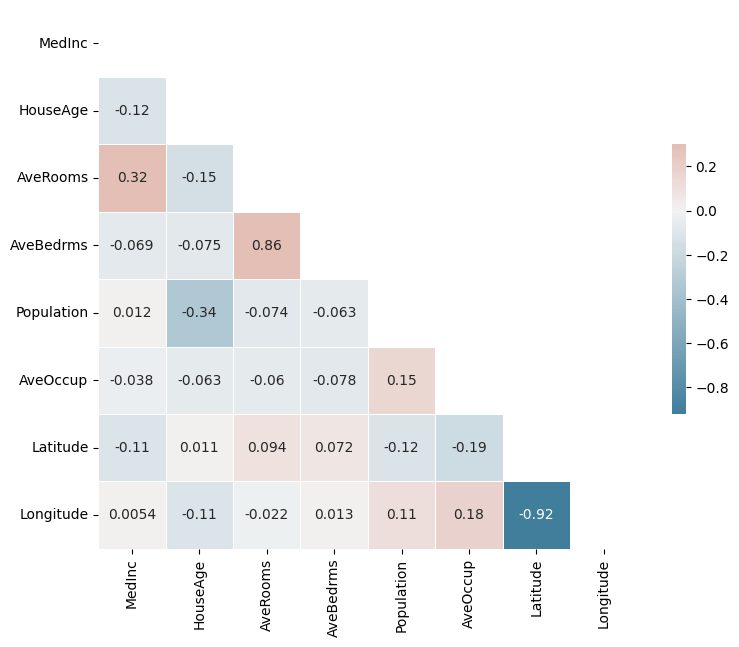

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)




**Conclusion** 
- *Longitude* and *Latitude* are highly correlated. Therefore, we have multicollinearity. (-92% corr)
- We can drop one of them
- Note: even if your goal is not to reduce multicollinearity, you can still drop one of the columns if you want to get efficiency and reduce the number of columns. Because 1 is enough to help predict y (target).
- Another pair is *AvgBedrms* and *AvgRooms* (we can drop one of them)

#### VIF Analysis

- Variance Inflation Factor (also called the inflation of coefficient variance)
- It's a a measure used for regression analysis to assess the extent of multicollinearity (for independent variables)
- After calculating VIF, inspect the proportions across the features. Then, choose the highest 2 or 3 to drop
- Range:
    - VIF = 1 -> there's no multicollinearity
    - VIF > 5 and < 10 multicollinearity, but acceptable if other columns have much higher
    - VIF >10 high multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# build a dataframe with col names and their VIF

vif_report = pd.DataFrame(X.columns, columns=['FeatureName'])
vif_report

FeatureName
0      MedInc
1    HouseAge
2    AveRooms
3   AveBedrms
4  Population
5    AveOccup
6    Latitude
7   Longitude

In [ ]:
vif_report['VIF'] = [variance_inflation_factor(X.values, col) for col in range(len(X.columns))]
vif_report

FeatureName         VIF
0      MedInc   13.006483
1    HouseAge    7.337229
2    AveRooms   55.638853
3   AveBedrms   50.902736
4  Population    3.214621
5    AveOccup   41.066431
6    Latitude  602.093146
7   Longitude  821.995993

In [ ]:
#sort the data
vif_report.sort_values(by='VIF', ascending=False)

FeatureName         VIF
7   Longitude  821.995993
6    Latitude  602.093146
2    AveRooms   55.638853
3   AveBedrms   50.902736
5    AveOccup   41.066431
0      MedInc   13.006483
1    HouseAge    7.337229
4  Population    3.214621

> It's recommended to observe both correlation matrix and VIF to consider what columns to drop.

In [ ]:
# repeating the model fit process with low VIF
X_low_vif = X.drop(columns=['Longitude', 'AveRooms'], axis=1)
X_low_vif_constant = sm.add_constant(X_low_vif) 
ols_model_low_vif = sm.OLS(y, X_low_vif_constant).fit() 
ols_model_low_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     4762.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:57:59   Log-Likelihood:                -17889.
No. Observations:               17086   AIC:                         3.579e+04
Df Residuals:                   17079   BIC:                         3.585e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3369      0.107     31.251      0.000       3.128       3.546
MedInc         0.4286      0.003    155.518      0.000       0.423       0.434
HouseAge       0.0171      0.000     37.690      0.000       0.016       0.018
AveBedrms      0.0201      0.011      1.764      0.078      -0.002       0.042
Population  6.863e-05   5.23e-06     13.118      0.000    5.84e-05    7.89e-05
AveOccup      -0.4576      0.012    -39.763      0.000      -0.480      -0.435
Latitude      -0.0640      0.003    -25.407      0.000      -0.069      -0.059
==============================================================================
Omnibus:                     2622.706   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7031.677
Skew:                           0.843   Prob(JB):                         0.00
Kurtosis:                       5.653   Cond. No.                     3.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- We notice a lower R-squared, but that's ok since it's not the main objective.
- We're trying to focus on what factors drive the MedHouseVal and get clean coefficients
- We dropped AveRoom because it had higher VIF than **AveBdrms**. However, we may want to revisit and consider the opposite. Keep AveRooms and drop **AveBdrms** because AveRooms gives a full picture on the total number of all rooms.
- We should also consider the business side of it - which coefficients we can control or need to observe.
- If we think geo-location is important and need to be kept, consider dimensionality reduction using PCA.
- You can consider dropping ore features. Use trial and error to get the best outcome. 

it's normal to see a lower R-squared after removing multicollinear features. Here's why:

Multicollinearity inflates R-squared
When features are highly correlated, they can artificially inflate the R-squared value. This is because the model is essentially using the same information multiple times, which can make it appear more accurate than it actually is.

Removing multicollinearity reduces R-squared
When you remove multicollinear features, you're reducing the amount of redundant information in the model. This can lead to a lower R-squared value, as the model is no longer benefiting from the artificial inflation caused by multicollinearity.

> You don't have to stick with the selection above. you can always perform trial and error with different columns until you get the satisfied results.

> If the model's performance is important, consider inspecting the relationship between each feature and the target

In [ ]:
len(X.columns)

8

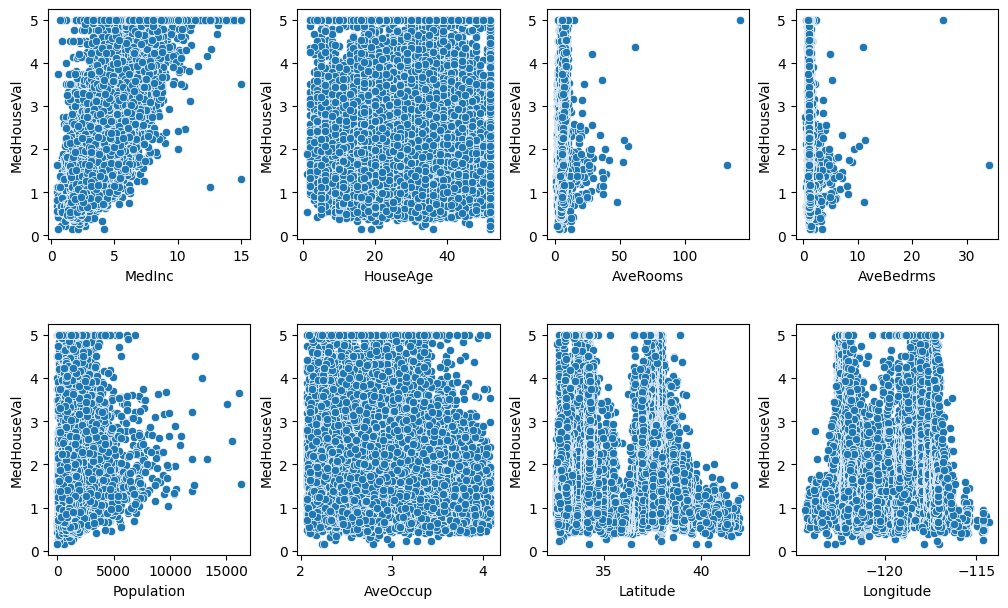

In [ ]:
#we can use the same method to do histplot
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(10, 6))
axs = axs.flatten()

for i,ft in enumerate(X.columns):
    sns.scatterplot(data=df, x=ft, y='MedHouseVal', ax=axs[i])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)

**Observation** looks like most features don't have a good linear relationship with the target, which explains why we got a low R-Squared score. Therefore, we can experiment with different models.

## Linear vs Polynomial Regression

- The term polynomial is a type of math expression made by adding/subtracting/multiplying numbers and variables - with variables that have powers or exponents.
- Therefore, Polynomial Regression is a way of modeling the relationship between the independent variable(s) X and the dependent variable y, where the relationship isn't necessarily a **stright line** (could be curved).
    - Linear Regression: $y = B_0 + B_1X$
    - Polynomial Regression: e.g. $y = B_0 + B_1X + B_2X^2$

![p](https://miro.medium.com/v2/resize:fit:1200/1*9x_5VZjJ1b5LhVvm5xRSRw.jpeg)

In [21]:
plt.style.use('fivethirtyeight')

**Objective** predict salary based on level.

In [22]:
path = '/Users/bassel_instructor/Documents/Datasets/'

df = pd.read_csv(path+'position_salaries.csv')
df.head()

Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

> Let's deploy a simple linear regression with 1 independent (X) and 1 dependent variables (y)

In [23]:
X = df[['Level']] # make sure you have the double brackets
y= df[['Salary']]

Text(0, 0.5, 'Salary')

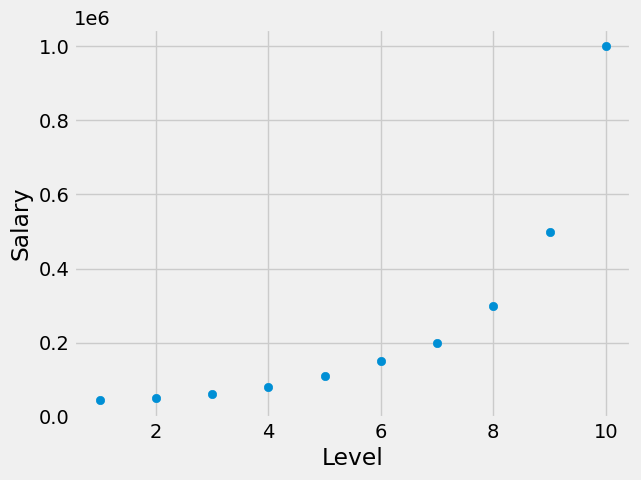

In [24]:
plt.scatter(X,y)
plt.xlabel('Level')
plt.ylabel('Salary')

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

### Classic Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression()

### Polynomial Regression

![p](https://miro.medium.com/v2/resize:fit:1400/1*YDnuvD8M4kmkYHyth5mELA.jpeg)

1. Convert features to polynomial features
2. Deploy Linear Regression on the new features

In [27]:
from sklearn.preprocessing import PolynomialFeatures
#step 1
pol_feat = PolynomialFeatures(degree=4) #this is a hyperparameter that can adjusted based on performance
X_train_pol = pol_feat.fit_transform(X_train)

In [28]:
# step 2
pr_model = LinearRegression()
pr_model.fit(X_train_pol, y_train) # using the new features makes the problem Polynomial

LinearRegression()

#### Plot Both Models for Comparison

In [29]:
lr_fitted_line = lr_model.predict(X)
pr_fitted_line = pr_model.predict(pol_feat.fit_transform(X))

Text(0.5, 1.0, 'Polynomial Regression Solution (4 Degrees)')

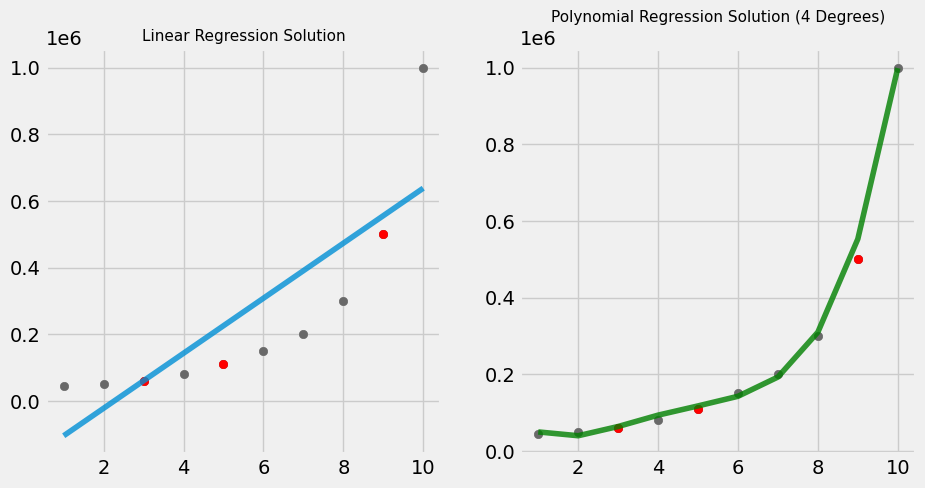

In [30]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5))

axs[0].scatter(X, y, color='dimgray')
axs[0].scatter(X_test, y_test, color='red')
axs[0].plot(X, lr_fitted_line, alpha=0.8)
axs[0].set_title('Linear Regression Solution', fontsize=11)


axs[1].scatter(X, y, color='dimgray')
axs[1].scatter(X_test, y_test, color='red')
axs[1].plot(X, pr_fitted_line, alpha=0.8, color='green')
axs[1].set_title('Polynomial Regression Solution (4 Degrees)', fontsize=11)

In [31]:
print('Linear Regression Coefficients:',lr_model.coef_)
print('Polynomial Regression Coefficients:',pr_model.coef_) #coefficients for the following power values[0, 1, 2, 3, 4]

Linear Regression Coefficients: [[82522.42152466]]
Polynomial Regression Coefficients: [[      0.         -149924.30468048   71184.15004536  -12075.0518825
      731.49506962]]


In [32]:
print('Linear Regression Intercept:', lr_model.intercept_)
print('Polynomial Regression Intercept:', pr_model.intercept_)

Linear Regression Intercept: [-187264.57399103]
Polynomial Regression Intercept: [139446.33912192]


In real applications (like apps, embedded devices, real-time services), you might save the coefficients and use them directly in production code without loading the full sklearn model.
This is super helpful when you need speed and simplicity (no model loading).

Example in a microcontroller (say Arduino, C++, etc):



**Note:**
- First coefficient is 0 (for the dummy "bias" term in `PolynomialFeatures` — you can ignore it).
- The rest correspond to:
  - \(x^1\) (linear)
  - \(x^2\) (quadratic)
  - \(x^3\) (cubic)
  - \(x^4\) (quartic)


In [33]:
# Given
intercept = 139446.33912192
coefficients = [0, -149924.30468048, 71184.15004536, -12075.0518825, 731.49506962]

x = 2.5

# Manual prediction
y_pred = (intercept +  #first value (0) can be ignored
          coefficients[1] * x + 
          coefficients[2] * (x**2) + 
          coefficients[3] * (x**3) + 
          coefficients[4] * (x**4))

print(y_pred)


49437.85569718871


In [34]:
def predict_polynomial(x, intercept, coefficients):
    y = intercept
    for power in range(1, len(coefficients)):
        y += coefficients[power] * (x ** power)
    return y

# Example usage
predict_polynomial(2.5, intercept, coefficients)


49437.85569718871